In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
!cd ../MonteCarlo/bin/ && ./caminante_1d

n_max: 20, rw:15 ,exp: 1000, prob_mean: 0.526200, error: 0.009710
n_max: 40, rw:15 ,exp: 1000, prob_mean: 0.633000, error: 0.009479
n_max: 80, rw:15 ,exp: 1000, prob_mean: 0.706600, error: 0.009424
n_max: 160, rw:15 ,exp: 1000, prob_mean: 0.765733, error: 0.009042
n_max: 320, rw:15 ,exp: 1000, prob_mean: 0.830800, error: 0.008037
n_max: 640, rw:15 ,exp: 1000, prob_mean: 0.877200, error: 0.007286
n_max: 1280, rw:15 ,exp: 1000, prob_mean: 0.901867, error: 0.006587
n_max: 2560, rw:15 ,exp: 1000, prob_mean: 0.930400, error: 0.005830
n_max: 5120, rw:15 ,exp: 1000, prob_mean: 0.959800, error: 0.004272
n_max: 10240, rw:15 ,exp: 1000, prob_mean: 0.969067, error: 0.003727


   n_max  caminantes  experimentos      prob     error
0     20          30          1000  0.439367  0.008115
1     40          30          1000  0.536100  0.008895
2     80          30          1000  0.627133  0.009168
3    160          30          1000  0.693033  0.008943
4    320          30          1000  0.784467  0.008283
5    640          30          1000  0.815500  0.007929
6   1280          30          1000  0.879933  0.006621
7   2560          30          1000  0.909367  0.006085
8   5120          30          1000  0.931100  0.005393
9  10240          30          1000  0.957600  0.004284


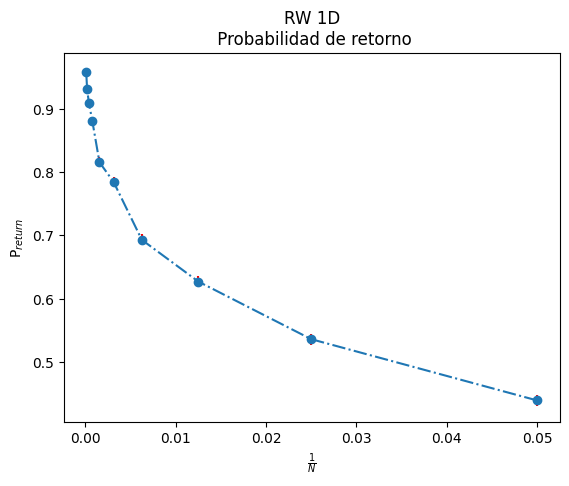

In [34]:
archivo="caminante_1d.csv"
ruta = f'Datos/{archivo}'
titulo_dim="RW 1D\n Probabilidad de retorno"
df = pd.read_csv(ruta,sep=",")
print(df)

'''
plt.scatter(df['n_max'],df['prob'])
plt.title(titulo_dim)
plt.xlabel('Repeticiones')
plt.ylabel('Probabilidad')
plt.show()
'''

plt.errorbar(1/df['n_max'],df['prob'],yerr=df["error"],marker="o",ls="-.",ecolor="red")
plt.title(titulo_dim)
plt.xlabel('$\\frac{1}{N}$')
#plt.xscale("log")
plt.ylabel('P$_{return}$')
plt.show()

### Comparación para comprobación de funciones matematicas escritas en Python y en C 

In [17]:
sum=0
for i in df[0]:
    sum+=i
prom=sum/len(df[0])

sum_x2=0
for i in df[0]:
    sum_x2+=i**2
var = (sum_x2-len(df[0])*(prom**2))/(len(df[0])-1)

err= np.sqrt(var/len(df[0]))

print(f"mean: {prom}")
print(f"var: {var}")
print(f"err: {err}")

mean: 10.196482110588938
var: 11.08106196819768
err: 0.332882291030894


In [19]:
!cd ../MonteCarlo/bin/ && ./math_stats_test

mean: 10.196482
 var: 11.081062
 err: 0.332882
